In [1]:
import networkx as nx
import os
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## Multiprocessing Package - Speed up simulation
from multiprocessing import cpu_count
from dask.distributed import Client, progress
import dask
client = Client(threads_per_worker=2)
client

/home/michael/miniconda3/envs/dask/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:45915 Dashboard: http://127.0.0.1:46655/status,Cluster Workers: 8 Cores: 16 Memory: 33.60 GB


In [3]:
# Parameters
phis = [0.05, 0.10, 0.18, 0.2, 0.25, 0.5]
phi_fixed = 0.18
names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

## Facebook

Influentials analysis for Facebook data.

In [4]:
facebook = nx.read_edgelist("Data/facebook.txt")
print(nx.info(facebook))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [7]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(facebook, phi=phi,  directed=False))

results_facebook = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 3381.59it/s]


CPU times: user 1min 17s, sys: 11.8 s, total: 1min 29s
Wall time: 12min 49s


## Analysis



In [ ]:
## Preload Data
#file_dir = "./Results"
# fb_fn_phi = "facebook_phi.npy"
# fb_fn_q = "facebook_q.npy"
# fb = np.load(os.path.join(file_dir, fb_fn_phi))
# fb_q = np.load(os.path.join(file_dir, fb_fn_q))

In [8]:
fb = np.array(results_facebook[0])

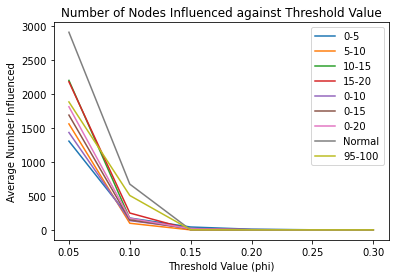

In [9]:
plt.plot(phis, fb[:,0])
plt.plot(phis, fb[:,1])
plt.plot(phis, fb[:,2])
plt.plot(phis, fb[:,3])
plt.plot(phis, fb[:,4])
plt.plot(phis, fb[:,5])
plt.plot(phis, fb[:,6])
plt.plot(phis, fb[:,7])
plt.plot(phis, fb[:,8])
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Number of Nodes Influenced against Threshold Value")
plt.legend(names)

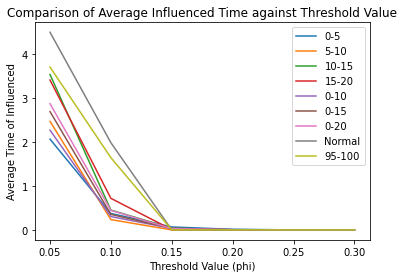

In [10]:
plt.plot(phis, fb[:,9])
plt.plot(phis, fb[:,10])
plt.plot(phis, fb[:,11])
plt.plot(phis, fb[:,12])
plt.plot(phis, fb[:,13])
plt.plot(phis, fb[:,14])
plt.plot(phis, fb[:,15])
plt.plot(phis, fb[:,16])
plt.plot(phis, fb[:,17])
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Comparison of Average Influenced Time against Threshold Value")
plt.legend(names)

In [11]:
file_dir = "./Results"
fb_fn = "facebook.npy"

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(os.path.join(file_dir, fb_fn), fb)


## Advogato

Influentials analysis for Advogato data.

In [8]:
advogato = nx.read_edgelist("Data/soc-advogato.edges", data=(('weight',float),))
print(nx.info(advogato))

Name: 
Type: Graph
Number of nodes: 6551
Number of edges: 43427
Average degree:  13.2581


In [ ]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(advogato, phi=phi,  directed=False))

results_advogato = dask.compute(pool)

## Analysis



In [ ]:
av = np.array(results_facebook[0])

In [ ]:
plt.plot(phis, av[:,0])
plt.plot(phis, av[:,1])
plt.plot(phis, av[:,2])
plt.plot(phis, av[:,3])
plt.plot(phis, av[:,4])
plt.plot(phis, av[:,5])
plt.plot(phis, av[:,6])
plt.plot(phis, av[:,7])
plt.plot(phis, av[:,8])
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Number of Nodes Influenced against Threshold Value")
plt.legend(names)

In [ ]:
plt.plot(phis, av[:,9])
plt.plot(phis, av[:,10])
plt.plot(phis, av[:,11])
plt.plot(phis, av[:,12])
plt.plot(phis, av[:,13])
plt.plot(phis, av[:,14])
plt.plot(phis, av[:,15])
plt.plot(phis, av[:,16])
plt.plot(phis, av[:,17])
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Comparison of Average Influenced Time against Threshold Value")
plt.legend(names)

In [ ]:
file_dir = "./Results"
av_fn = "advogato.npy"

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(os.path.join(file_dir, av_fn), av)